In [23]:
import dash
import dash_cytoscape as cyto
import dash_html_components as html
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import matplotlib.cm as cm

def find_distances(sim_row):

    row = pairwise_similarity.toarray()[sim_row]
    tups = list(map(list, zip([names_dict[sim_row]]*len(row), [names_dict[row] for row in range(len(row))], row)))
    tups = sorted(tups, 
                  key = lambda x: x[2], reverse=True
                 )
    
    edge_tups = tups[1:11]
    
    edge_tups.extend(tups[-10:])
    #Normalize list to (0, 1) bounds, add to lists
    sims = [edge_tups[ix][2] for ix in range(len(edge_tups))]
    
    sims = min_max_scaler.fit_transform(np.array(sims).reshape(-1, 1)).flatten()

    [edge_tups[ix].append(sims[ix]) for ix in range(len(edge_tups))]
    return edge_tups

new_pairs = find_distances(3)

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])



elements = [
    {'data': {'id': 'center', 'label': '{}'.format(new_pairs[0][0])}}, 
]
            
            
elements.extend(
           [
               {'data': {'id': 'node_{}'.format(new_pairs[ix][1]), 
                         'label': '{}'.format(new_pairs[ix][1])}} 
               for ix in range(len(new_pairs))
           ]
)
elements.extend(
    [
            {'data': {
                'source': 'center', 'weight': str(
                    round(100*new_pairs[ix][2], 2)
                )+'%', 'target': 'node_{}'.format(
                    new_pairs[ix][1]
                ), 
                'label': 'center to {}'.format(new_pairs[ix][1]),
                'background-color': 'rgba{}'.format(plt.cm.bwr(new_pairs[ix][3]))
                     }
            } for ix in range(len(new_pairs))
    ]
)


app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape',
        layout={'name': 'concentric'},
        style={'width': '100%', 'height': '400px'},
        elements= elements,
        stylesheet = [
            {
            'selector': 'edge',
            'style': {
                'label': 'data(weight)', 
                
                     }
        },
            {
            'selector' : 'node',
            'style': {
#                 'label': 'data(label)',
                'background-color': 'rgba(89, 23, 1, 0)'
                
            }
        }
        ],      
    )
])


if __name__ == '__main__':
    app.run_server(mode = 'inline', port = 8991, debug=True)

In [ ]:
pprint(app.layout.children[0].elements)

In [34]:
sims = [x[2] for x in new_pairs]
weights_bins = [x[3] for x in new_pairs]

In [35]:
def cmap_at_scale(cmap, bins):
    # cmap:  mpl or cmocean colormap 
    # bins :  ascending ordered list  of floats in [0,1] that defines the scale for a plotly colorscale derived from cmap
    # returns   a list of hexcolors
    
    if not isinstance(bins, (list, np.ndarray)):
        raise ValueError('bins should be a 1d list or  an array')
    if not  (0 <= np.asarray(bins).min() <= 1) or  not  (0 <= np.asarray(bins).max() <= 1):
        raise ValueError('The elements in bins should be in [0,1]')
    scale  = sorted(bins)
    colors = cmap(scale)[:, :3]
    colors = (255*colors+0.5).astype(np.uint8)
    hexcolors = [f'#{c[0]:02x}{c[1]:02x}{c[2]:02x}' for c in colors]
    return hexcolors

def val_to_color(val, bins, colors):
    # val: float in [0,1]
    # colors:  a list of hex colors representing the Plotly colorscale with scale bins and colors colors
    if not isinstance(colors[0], str):
        raise ValueError('The elements of colors must be strings (hex colors)')
    if colors[0][0] != '#':
        raise ValueError('Your color codes are not hex codes')
    if len(bins) != len(colors):
        raise ValueError('bins and colors must have the same length') 
    
    #find the index of the  bin  that gives the interval the val belongs to
    # see https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html
    idx = np.digitize(val, bins)

    #associate to val a color in colors
    vcolor = colors[idx-1]
    
    return   idx, vcolor       

In [37]:
weights = np.random.rand(56)

colors01 = cmap_at_scale(cm1, weights_bins)

In [38]:
colors01

['#0000ff',
 '#0600f9',
 '#0600f9',
 '#0900f6',
 '#0a00f5',
 '#0e00f1',
 '#1300ec',
 '#1500ea',
 '#1600e9',
 '#1700e8',
 '#d70028',
 '#d70028',
 '#d80027',
 '#e1001e',
 '#e3001c',
 '#e5001a',
 '#e60019',
 '#f80007',
 '#f90006',
 '#ff0000']

In [39]:
weights = np.random.rand(55)

node_cc =  [] # a list 
for k in range(len(weights)):
    idx, hexc = val_to_color(weights[k], weights_bins, colors01)
    node_cc.append({'class': f'.c{idx}', 'color': hexc}) 

In [47]:
len(node_cc)

55

In [40]:
len()

[{'class': '.c10', 'color': '#1700e8'},
 {'class': '.c15', 'color': '#e3001c'},
 {'class': '.c3', 'color': '#0600f9'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c19', 'color': '#f90006'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c1', 'color': '#0000ff'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {'class': '.c10', 'color': '#1700e8'},
 {

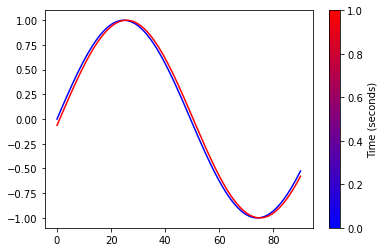

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm

start_time = 0
end_time = 1

# Generate some dummy data.
tim = range(start_time,end_time+1)
xdat = np.arange(0,90.1)
ydat = [np.sin(0.2*(xdat-t)/np.pi) for t in tim]


# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("BuRd",["b","r"])

# Make a normalizer that will map the time values from
# [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin=min(tim),vmax=max(tim))

# Turn these into an object that can be used to map time values to colors and
# can be passed to plt.colorbar().
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)
cpick.set_array([])



F = plt.figure()
A = F.add_subplot(111)
for y, t in zip(ydat,tim):
    A.plot(xdat,y,color=cpick.to_rgba(t))

plt.colorbar(cpick,label="Time (seconds)")


In [3]:
help(cm1)

Help on LinearSegmentedColormap in module matplotlib.colors object:

class LinearSegmentedColormap(Colormap)
 |  LinearSegmentedColormap(name, segmentdata, N=256, gamma=1.0)
 |  
 |  Colormap objects based on lookup tables using linear segments.
 |  
 |  The lookup table is generated using linear interpolation for each
 |  primary color, with the 0-1 domain divided into any number of
 |  segments.
 |  
 |  Method resolution order:
 |      LinearSegmentedColormap
 |      Colormap
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, segmentdata, N=256, gamma=1.0)
 |      Create color map from linear mapping segments
 |      
 |      segmentdata argument is a dictionary with a red, green and blue
 |      entries. Each entry should be a list of *x*, *y0*, *y1* tuples,
 |      forming rows in a table. Entries for alpha are optional.
 |      
 |      Example: suppose you want red to increase from 0 to 1 over
 |      the bottom half, green to do the same over t

In [4]:
from pprint import pprint
pprint(app.layout)

NameError: name 'app' is not defined

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["I'd like an apple", 
              "An apple a day keeps the doctor away", 
              "Never compare an apple to an orange", 
              "I prefer scikit-learn to Orange", 
              "The scikit-learn docs are Orange and Blue"] 


vect = TfidfVectorizer(min_df=1, stop_words="english")       

tfidf = vect.fit_transform(corpus) 

pairwise_similarity = tfidf * tfidf.T 

ps = pairwise_similarity.toarray()

ps

array([[1.        , 0.17668795, 0.27056873, 0.        , 0.        ],
       [0.17668795, 1.        , 0.15439436, 0.        , 0.        ],
       [0.27056873, 0.15439436, 1.        , 0.19635649, 0.16815247],
       [0.        , 0.        , 0.19635649, 1.        , 0.54499756],
       [0.        , 0.        , 0.16815247, 0.54499756, 1.        ]])

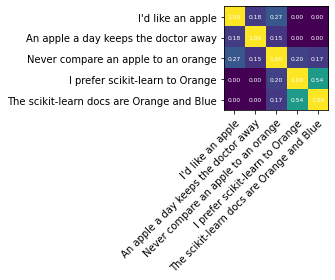

In [6]:
import matplotlib.pyplot as plt 
import numpy as np

def heatmap(x_labels, y_labels, values):
    fig, ax = plt.subplots()
    im = ax.imshow(values)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(y_labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10,
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, "%.2f"%values[i, j],
                           ha="center", va="center", color="w", 
    fontsize=6)

    fig.tight_layout()
    plt.show()
    
    return fig
    
grid = heatmap(corpus, corpus, pairwise_similarity.toarray())

In [7]:
ps = pairwise_similarity.toarray()

def pairwise_coords(ps_array):
    ps_coords = []
    for i in range(ps_array.shape[0]):
        for j in range(ps_array.shape[1]):
            ps_coords.append([i, j, ps[i, j]])
            
    return ps_coords

pairwise_coords(ps)

[[0, 0, 0.9999999999999998],
 [0, 1, 0.17668795478716204],
 [0, 2, 0.27056873300683837],
 [0, 3, 0.0],
 [0, 4, 0.0],
 [1, 0, 0.17668795478716204],
 [1, 1, 0.9999999999999999],
 [1, 2, 0.1543943648960287],
 [1, 3, 0.0],
 [1, 4, 0.0],
 [2, 0, 0.27056873300683837],
 [2, 1, 0.1543943648960287],
 [2, 2, 1.0],
 [2, 3, 0.1963564882520361],
 [2, 4, 0.16815247007633355],
 [3, 0, 0.0],
 [3, 1, 0.0],
 [3, 2, 0.1963564882520361],
 [3, 3, 0.9999999999999999],
 [3, 4, 0.5449975578692606],
 [4, 0, 0.0],
 [4, 1, 0.0],
 [4, 2, 0.16815247007633355],
 [4, 3, 0.5449975578692606],
 [4, 4, 1.0]]

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate
import os,glob
from xml.etree.ElementTree import ParseError
from xml.etree import cElementTree as ET
from io import BytesIO
from bs4 import BeautifulSoup
import base64
import spacy
nlp = spacy.load('en_core_web_lg')

#Get 1st training set filepaths
folder_path = 'Downloads/training-PHI-Gold-Set1/'
folder_path_2 = 'Downloads/training-PHI-Gold-Set2/'

def get_files(folder_path):
    files = []
    for ix, filename in enumerate(glob.glob(os.path.join(folder_path, '*.xml'))):
      with open(filename, 'r') as f:
        try:
            tree = ET.parse(f)
            root = ET.tostring(tree.getroot(), encoding='utf-8', method='xml')
            files.append(root)
        except ParseError:
            print('Error found at file {}.'.format(ix))
            continue
    return files

files = get_files(folder_path)
files2 = get_files(folder_path_2)
files.extend(files2)

docs = [BeautifulSoup(file).text[1:] for file in files]

Error found at file 0.
Error found at file 0.


In [9]:
import shorttext
import numpy as np
import pandas as pd
from stemming.porter2 import stem
 
import re

pipeline = [lambda s: re.sub('[^\w\s]', '', s),
            lambda s: re.sub('[\d]', '', s),
            lambda s: s.lower(),
            lambda s: ' '.join(map(stem, shorttext.utils.tokenize(s)))
 ]
txtpreprocessor = shorttext.utils.text_preprocessor(pipeline)

docids = range(len(docs))   # defining document IDs
corpus = [txtpreprocessor(doc).split(' ') for doc in docs]

dtm = shorttext.utils.DocumentTermMatrix(corpus, docids=docids, tfidf=False)


In [10]:
sorted(dtm.get_token_occurences(stem('the')), key = lambda x: dtm.get_token_occurences(stem('the'))[x], reverse=True)

[481,
 31,
 587,
 430,
 356,
 573,
 451,
 150,
 539,
 343,
 696,
 395,
 750,
 478,
 496,
 625,
 49,
 294,
 674,
 371,
 514,
 184,
 393,
 308,
 438,
 526,
 769,
 426,
 598,
 317,
 385,
 504,
 522,
 29,
 273,
 725,
 213,
 222,
 398,
 68,
 415,
 676,
 682,
 87,
 112,
 234,
 239,
 244,
 307,
 377,
 378,
 392,
 460,
 699,
 782,
 195,
 220,
 341,
 429,
 692,
 758,
 39,
 400,
 411,
 99,
 268,
 559,
 671,
 736,
 25,
 190,
 238,
 309,
 502,
 533,
 3,
 314,
 329,
 380,
 461,
 709,
 7,
 33,
 36,
 168,
 204,
 269,
 285,
 342,
 506,
 512,
 618,
 623,
 691,
 781,
 13,
 72,
 81,
 95,
 103,
 134,
 335,
 362,
 520,
 578,
 643,
 658,
 673,
 765,
 2,
 80,
 90,
 180,
 196,
 301,
 353,
 368,
 493,
 557,
 612,
 677,
 0,
 20,
 41,
 174,
 179,
 315,
 331,
 433,
 439,
 473,
 538,
 586,
 644,
 663,
 670,
 693,
 783,
 83,
 139,
 141,
 163,
 271,
 280,
 313,
 384,
 404,
 447,
 487,
 650,
 702,
 718,
 1,
 46,
 59,
 77,
 122,
 133,
 138,
 148,
 185,
 207,
 221,
 264,
 279,
 311,
 382,
 407,
 503,
 564,
 565,
 579,


In [11]:
dtm.get_token_occurences(stem('the'))

{0: 17.0,
 1: 15.0,
 2: 18.0,
 3: 21.0,
 4: 1.0,
 5: 1.0,
 6: 6.0,
 7: 20.0,
 8: 4.0,
 9: 4.0,
 10: 1.0,
 11: 11.0,
 12: 4.0,
 13: 19.0,
 15: 4.0,
 16: 11.0,
 17: 5.0,
 18: 5.0,
 19: 9.0,
 20: 17.0,
 21: 12.0,
 23: 5.0,
 24: 10.0,
 25: 22.0,
 26: 1.0,
 27: 7.0,
 28: 1.0,
 29: 30.0,
 30: 8.0,
 31: 68.0,
 32: 7.0,
 33: 20.0,
 34: 8.0,
 35: 3.0,
 36: 20.0,
 38: 4.0,
 39: 24.0,
 40: 4.0,
 41: 17.0,
 42: 5.0,
 43: 7.0,
 44: 9.0,
 45: 1.0,
 46: 15.0,
 47: 8.0,
 48: 2.0,
 49: 39.0,
 50: 6.0,
 52: 6.0,
 53: 12.0,
 54: 4.0,
 56: 13.0,
 57: 2.0,
 58: 3.0,
 59: 15.0,
 60: 10.0,
 62: 2.0,
 64: 11.0,
 65: 4.0,
 66: 9.0,
 68: 27.0,
 69: 1.0,
 70: 14.0,
 71: 1.0,
 72: 19.0,
 73: 4.0,
 74: 11.0,
 75: 4.0,
 76: 12.0,
 77: 15.0,
 78: 12.0,
 80: 18.0,
 81: 19.0,
 82: 2.0,
 83: 16.0,
 84: 10.0,
 85: 4.0,
 86: 5.0,
 87: 26.0,
 88: 1.0,
 89: 1.0,
 90: 18.0,
 91: 1.0,
 92: 11.0,
 93: 6.0,
 94: 8.0,
 95: 19.0,
 99: 23.0,
 100: 3.0,
 101: 12.0,
 102: 6.0,
 103: 19.0,
 104: 1.0,
 105: 12.0,
 107: 2.0,
 108: 2.0

In [13]:
import names

for x in range(10):
    print(names.get_full_name())

Cora Levy
Alejandro Jones
Willie Porter
Erika Wittke
George Lewis
Susan Simkins
Theresa Frappier
Jason Griffin
Lois Bryant
Nikki Smith


In [14]:
names_dict = {num: names.get_full_name() for num in range(len(files))}

In [15]:
names_dict

{0: 'Margaret Davis',
 1: 'Dewayne Johnson',
 2: 'Olive Parker',
 3: 'Bernadette Lopez',
 4: 'Ricarda Mcmillian',
 5: 'Richard Bodden',
 6: 'Carlton Newby',
 7: 'Dustin Mayo',
 8: 'Steve Beauchamp',
 9: 'Yolanda Harris',
 10: 'Dale Amedee',
 11: 'Daniel Woll',
 12: 'Lionel Mahaffey',
 13: 'Diane Gaynor',
 14: 'Nicole Coyle',
 15: 'Phillip Johnson',
 16: 'Craig Franklin',
 17: 'Arthur Stallings',
 18: 'Nina Walls',
 19: 'Martha Banks',
 20: 'Tiffany Mcvey',
 21: 'Marco Stewart',
 22: 'Peter Berg',
 23: 'Ronald Sloan',
 24: 'Rebecca Smith',
 25: 'Hong Olson',
 26: 'Melissa Burgess',
 27: 'Elaine Perrigan',
 28: 'Amanda Loomis',
 29: 'Samuel Henry',
 30: 'Alma Hancock',
 31: 'George Fredette',
 32: 'Linda Enriquez',
 33: 'Josie Kemppainen',
 34: 'Benny Parson',
 35: 'Ruby Goodman',
 36: 'Ronnie Jones',
 37: 'Lisa Spicer',
 38: 'Dan Callaway',
 39: 'Sabrina Jacobs',
 40: 'Felicita Hambleton',
 41: 'Francisco Seng',
 42: 'Michael Austin',
 43: 'Beatrice Folger',
 44: 'Gary Hui',
 45: 'Henry

In [16]:
names_dict[4]

'Ricarda Mcmillian'

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
tfidf = TfidfVectorizer().fit_transform(docs)

pairwise_similarity = tfidf * tfidf.T

min_max_scaler = MinMaxScaler()

def find_distances(sim_row):

    row = pairwise_similarity.toarray()[sim_row]
    tups = list(map(list, zip([names_dict[sim_row]]*len(row), [names_dict[row] for row in range(len(row))], row)))
    tups = sorted(tups, 
                  key = lambda x: x[2], reverse=True
                 )
    
    edge_tups = tups[1:11]
    
    edge_tups.extend(tups[-10:])
    #Normalize list to (0, 1) bounds, add to lists
    sims = [edge_tups[ix][2] for ix in range(len(edge_tups))]
    
    sims = min_max_scaler.fit_transform(np.array(sims).reshape(-1, 1)).flatten()

    [edge_tups[ix].append(sims[ix]) for ix in range(len(edge_tups))]
    return edge_tups

new_pairs = find_distances(3)

In [20]:
#Initialize nx network graph
G=nx.Graph()

G.size(10)

existing_edges = {}

def build_graph_for_all(corr_data):
    count=0
    for d in corr_data:
        if (count > 40) :
            return
        if  d[0] not in existing_edges :
             G.add_node(str(d[0]))
        if  d[1] not in existing_edges :     
             G.add_node(str(d[1]))
        G.add_weighted_edges_from([[str(d[0]), str(d[1]),d[2]]])     
        count += 1

        
build_graph_for_all(new_pairs)



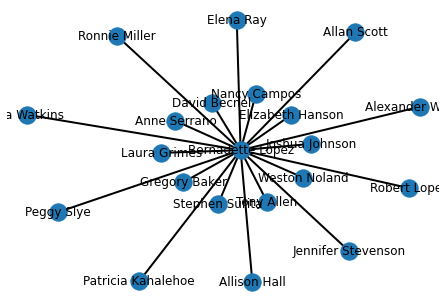

In [22]:
nx.draw(G,width=2, with_labels=True)